# Machine Learning Lab - Project 


 #### Importing packages


In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pickle
from sklearn.manifold import TSNE
from sklearn import preprocessing
from multiprocessing import Process
import multiprocessing
import shutil
import os

In [7]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score

#### Importing test and train datasets

In [8]:
df_test = pd.read_csv("test.csv" )

In [9]:
df_test.head()

,id,m_id,syst_direct_ipo_rate,syst_buffered_ipo_rate,syst_page_fault_rate,syst_page_read_ipo_rate,syst_process_count,syst_other_states,page_page_write_ipo_rate,page_global_valid_fault_rate,...,tcp_retxto,tcp_kpalv,lla0_pkts_recvpsec,lla0_pkts_sentpsec,llb0_pkts_recvpsec,llb0_pkts_sentpsec,ewc0_pkts_recvpsec,ewc0_pkts_sentpsec,ewd0_pkts_recvpsec,ewd0_pkts_sentpsec
0,0,f,30.20,335.77,0.00,0.00,165,10,0.00,0.00,...,0,0,410.567,259.683,0.717,0.017,229.117,375.250,272.233,201.167
1,1,a,75.30,665.08,30.33,4.53,271,12,9.83,13.45,...,1,0,484.250,516.700,67.817,89.483,666.533,554.267,496.233,387.850
2,2,c,31.02,251.00,0.00,0.00,259,22,0.38,0.00,...,0,0,242.300,251.150,15.483,20.767,229.800,220.300,315.483,277.767
3,3,e,38.78,493.92,0.05,0.00,252,10,7.65,0.05,...,0,0,394.900,515.850,25.033,34.550,302.733,230.600,308.483,273.650
4,4,b,62.83,379.27,0.00,0.00,318,10,0.27,0.00,...,0,0,332.467,290.283,66.050,93.083,226.067,331.033,228.017,233.450


In [10]:
df_train = pd.read_csv("train.csv")

In [11]:
df_train.head()

,m_id,syst_direct_ipo_rate,syst_buffered_ipo_rate,syst_page_fault_rate,syst_page_read_ipo_rate,syst_process_count,syst_other_states,page_page_write_ipo_rate,page_global_valid_fault_rate,page_free_list_size,...,tcp_kpalv,lla0_pkts_recvpsec,lla0_pkts_sentpsec,llb0_pkts_recvpsec,llb0_pkts_sentpsec,ewc0_pkts_recvpsec,ewc0_pkts_sentpsec,ewd0_pkts_recvpsec,ewd0_pkts_sentpsec,cpu_load
0,c,38.50,458.07,0.00,0.0,259,22,0.4,0.00,170323,...,0,415.483,479.983,15.367,20.667,281.383,245.533,278.767,277.300,medium
1,a,66.43,657.65,0.43,0.0,272,12,23.8,0.40,121776,...,0,526.533,554.550,67.300,88.650,438.583,401.633,436.000,366.183,medium
2,f,29.07,322.25,0.00,0.0,171,10,0.0,0.00,271435,...,0,337.967,314.067,0.667,0.017,230.333,230.050,220.200,240.333,low
3,e,1063.13,286.92,4.08,0.0,253,10,0.0,0.15,171316,...,0,336.000,379.833,24.250,33.400,249.767,251.300,178.183,139.733,high
4,f,22.97,369.32,0.00,0.0,165,10,0.0,0.00,280388,...,0,300.833,314.983,0.733,0.017,295.583,257.300,274.200,237.250,low


In [12]:
df_train = df_train.reset_index()

In [13]:
df_train.head()

,index,m_id,syst_direct_ipo_rate,syst_buffered_ipo_rate,syst_page_fault_rate,syst_page_read_ipo_rate,syst_process_count,syst_other_states,page_page_write_ipo_rate,page_global_valid_fault_rate,...,tcp_kpalv,lla0_pkts_recvpsec,lla0_pkts_sentpsec,llb0_pkts_recvpsec,llb0_pkts_sentpsec,ewc0_pkts_recvpsec,ewc0_pkts_sentpsec,ewd0_pkts_recvpsec,ewd0_pkts_sentpsec,cpu_load
0,0,c,38.50,458.07,0.00,0.0,259,22,0.4,0.00,...,0,415.483,479.983,15.367,20.667,281.383,245.533,278.767,277.300,medium
1,1,a,66.43,657.65,0.43,0.0,272,12,23.8,0.40,...,0,526.533,554.550,67.300,88.650,438.583,401.633,436.000,366.183,medium
2,2,f,29.07,322.25,0.00,0.0,171,10,0.0,0.00,...,0,337.967,314.067,0.667,0.017,230.333,230.050,220.200,240.333,low
3,3,e,1063.13,286.92,4.08,0.0,253,10,0.0,0.15,...,0,336.000,379.833,24.250,33.400,249.767,251.300,178.183,139.733,high
4,4,f,22.97,369.32,0.00,0.0,165,10,0.0,0.00,...,0,300.833,314.983,0.733,0.017,295.583,257.300,274.200,237.250,low


Renaming the index column to id 

### Data preprocessing for matching the test data set 

In [14]:
df_train.rename(columns = {'index':'id'}, inplace = True) 

In [15]:
df_train.head()

,id,m_id,syst_direct_ipo_rate,syst_buffered_ipo_rate,syst_page_fault_rate,syst_page_read_ipo_rate,syst_process_count,syst_other_states,page_page_write_ipo_rate,page_global_valid_fault_rate,...,tcp_kpalv,lla0_pkts_recvpsec,lla0_pkts_sentpsec,llb0_pkts_recvpsec,llb0_pkts_sentpsec,ewc0_pkts_recvpsec,ewc0_pkts_sentpsec,ewd0_pkts_recvpsec,ewd0_pkts_sentpsec,cpu_load
0,0,c,38.50,458.07,0.00,0.0,259,22,0.4,0.00,...,0,415.483,479.983,15.367,20.667,281.383,245.533,278.767,277.300,medium
1,1,a,66.43,657.65,0.43,0.0,272,12,23.8,0.40,...,0,526.533,554.550,67.300,88.650,438.583,401.633,436.000,366.183,medium
2,2,f,29.07,322.25,0.00,0.0,171,10,0.0,0.00,...,0,337.967,314.067,0.667,0.017,230.333,230.050,220.200,240.333,low
3,3,e,1063.13,286.92,4.08,0.0,253,10,0.0,0.15,...,0,336.000,379.833,24.250,33.400,249.767,251.300,178.183,139.733,high
4,4,f,22.97,369.32,0.00,0.0,165,10,0.0,0.00,...,0,300.833,314.983,0.733,0.017,295.583,257.300,274.200,237.250,low


In [16]:
df_test.head()

,id,m_id,syst_direct_ipo_rate,syst_buffered_ipo_rate,syst_page_fault_rate,syst_page_read_ipo_rate,syst_process_count,syst_other_states,page_page_write_ipo_rate,page_global_valid_fault_rate,...,tcp_retxto,tcp_kpalv,lla0_pkts_recvpsec,lla0_pkts_sentpsec,llb0_pkts_recvpsec,llb0_pkts_sentpsec,ewc0_pkts_recvpsec,ewc0_pkts_sentpsec,ewd0_pkts_recvpsec,ewd0_pkts_sentpsec
0,0,f,30.20,335.77,0.00,0.00,165,10,0.00,0.00,...,0,0,410.567,259.683,0.717,0.017,229.117,375.250,272.233,201.167
1,1,a,75.30,665.08,30.33,4.53,271,12,9.83,13.45,...,1,0,484.250,516.700,67.817,89.483,666.533,554.267,496.233,387.850
2,2,c,31.02,251.00,0.00,0.00,259,22,0.38,0.00,...,0,0,242.300,251.150,15.483,20.767,229.800,220.300,315.483,277.767
3,3,e,38.78,493.92,0.05,0.00,252,10,7.65,0.05,...,0,0,394.900,515.850,25.033,34.550,302.733,230.600,308.483,273.650
4,4,b,62.83,379.27,0.00,0.00,318,10,0.27,0.00,...,0,0,332.467,290.283,66.050,93.083,226.067,331.033,228.017,233.450


### EDA Analysis of Dataframe

In [17]:
df_train.shape


(119782, 89)

In [18]:
df_train.describe()

,id,syst_direct_ipo_rate,syst_buffered_ipo_rate,syst_page_fault_rate,syst_page_read_ipo_rate,syst_process_count,syst_other_states,page_page_write_ipo_rate,page_global_valid_fault_rate,page_free_list_size,...,tcp_retxto,tcp_kpalv,lla0_pkts_recvpsec,lla0_pkts_sentpsec,llb0_pkts_recvpsec,llb0_pkts_sentpsec,ewc0_pkts_recvpsec,ewc0_pkts_sentpsec,ewd0_pkts_recvpsec,ewd0_pkts_sentpsec
count,119782.000000,119782.000000,119782.000000,119782.000000,119782.000000,119782.000000,119782.000000,119782.000000,119782.000000,119782.000000,...,119782.000000,119782.000000,1.197820e+05,1.197820e+05,119782.000000,119782.000000,1.197820e+05,1.197820e+05,1.197820e+05,1.197820e+05
mean,59890.500000,163.301465,684.666261,7.421276,1.606043,243.818529,10.850871,7.229671,2.366581,176817.446202,...,0.075888,0.508833,2.063725e+08,1.375818e+08,31.279652,42.382363,4.687999e+12,7.188179e+12,6.563013e+12,5.313130e+12
std,34578.229309,547.578970,1435.427676,79.390552,21.437873,43.397069,5.428206,8.247744,23.459765,53470.917016,...,0.337381,3.486546,2.915828e+10,2.380783e+10,24.287782,33.278828,4.188527e+14,5.186389e+14,4.955808e+14,4.458990e+14
min,0.000000,0.000000,0.000000,0.000000,0.000000,165.000000,1.000000,0.000000,0.000000,84609.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.633000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,29945.250000,34.100000,350.370000,0.000000,0.000000,217.000000,10.000000,0.300000,0.000000,132817.000000,...,0.000000,0.000000,3.204500e+02,3.556500e+02,16.200000,21.583000,2.625670e+02,2.450170e+02,2.543670e+02,2.440330e+02
50%,59890.500000,42.850000,558.300000,0.000000,0.000000,247.000000,10.000000,4.430000,0.000000,177264.000000,...,0.000000,0.000000,3.874500e+02,4.642500e+02,21.633000,28.983000,3.273330e+02,3.022915e+02,3.172670e+02,3.014330e+02
75%,89835.750000,70.370000,712.680000,0.020000,0.000000,271.000000,12.000000,11.150000,0.000000,197856.750000,...,0.000000,0.000000,4.601457e+02,5.553170e+02,64.683000,88.733000,4.181000e+02,3.936790e+02,4.097670e+02,3.995830e+02
max,119781.000000,11567.100000,15169.270000,4305.720000,738.820000,323.000000,23.000000,83.330000,788.580000,280780.000000,...,6.000000,54.000000,4.119986e+12,4.119987e+12,78.933000,108.317000,3.743147e+16,3.743147e+16,3.743147e+16,3.743147e+16


In [19]:
df_train.columns

Index(['id', 'm_id', 'syst_direct_ipo_rate', 'syst_buffered_ipo_rate',
       'syst_page_fault_rate', 'syst_page_read_ipo_rate', 'syst_process_count',
       'syst_other_states', 'page_page_write_ipo_rate',
       'page_global_valid_fault_rate', 'page_free_list_size',
       'page_modified_list_size', 'io_mailbox_write_rate',
       'io_split_transfer_rate', 'io_file_open_rate', 'io_logical_name_trans',
       'io_page_reads', 'io_page_writes', 'page_free_list_faults',
       'page_modified_list_faults', 'page_demand_zero_faults', 'state_compute',
       'state_mwait', 'state_lef', 'state_hib', 'state_cur', 'app06_dirio',
       'app06_bufio', 'app06_pgflts', 'app06_proccount', 'app06_pagesgbl',
       'app06_pagesproc', 'app07_dirio', 'app07_bufio', 'app07_pgflts',
       'app07_proccount', 'app07_pagesgbl', 'app07_pagesproc', 'app04_dirio',
       'app04_bufio', 'app04_pgflts', 'app04_proccount', 'app04_pagesgbl',
       'app04_pagesproc', 'app08_dirio', 'app08_bufio', 'app08_pgflts'

In [98]:
df_train.dtypes

id                          int64
m_id                       object
syst_direct_ipo_rate      float64
syst_buffered_ipo_rate    float64
syst_page_fault_rate      float64
                           ...   
ewc0_pkts_recvpsec        float64
ewc0_pkts_sentpsec        float64
ewd0_pkts_recvpsec        float64
ewd0_pkts_sentpsec        float64
cpu_load                   object
Length: 89, dtype: object

In [14]:
df_train.isnull().sum()

id                        0
m_id                      0
syst_direct_ipo_rate      0
syst_buffered_ipo_rate    0
syst_page_fault_rate      0
                         ..
ewc0_pkts_recvpsec        0
ewc0_pkts_sentpsec        0
ewd0_pkts_recvpsec        0
ewd0_pkts_sentpsec        0
cpu_load                  0
Length: 89, dtype: int64

For ease : df_train assigned to df

In [95]:
df = df_train

In [18]:
corr = df.corr()
corr.shape

(87, 87)

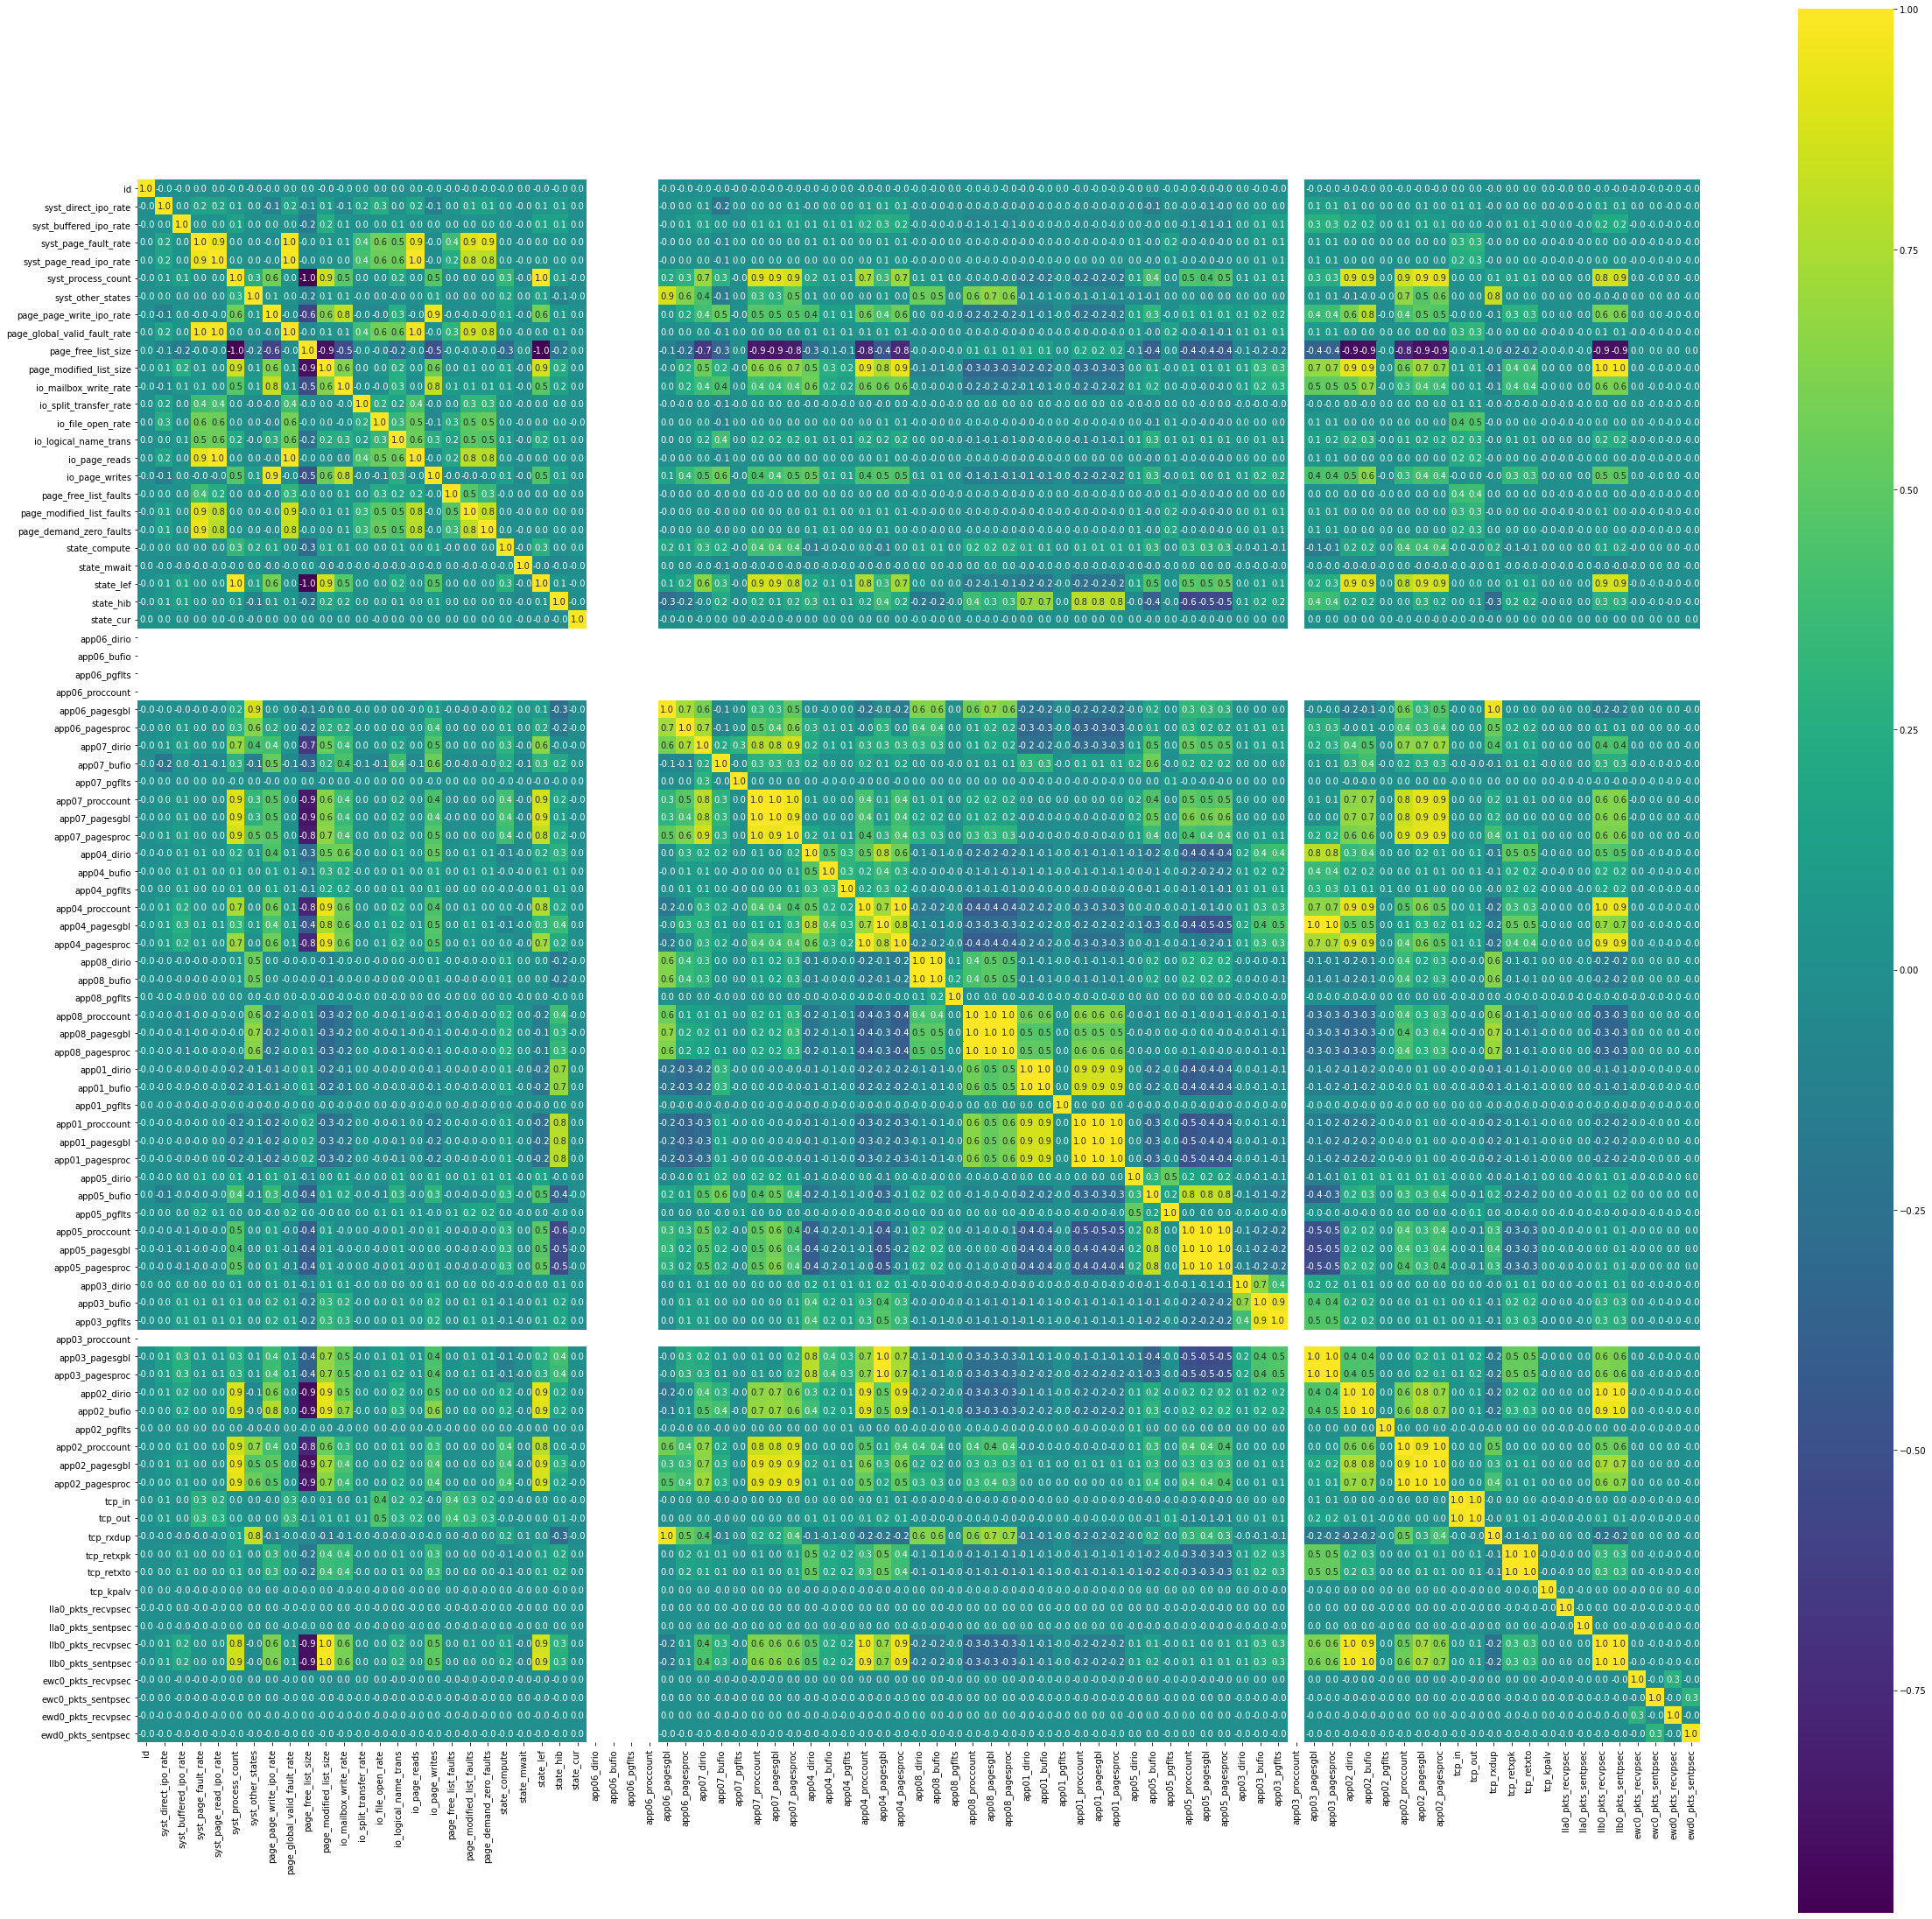

In [19]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(40,40))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True,cmap='viridis')
plt.show()

#### Inference from Correlation Matrix

1. App features are highly correlated with system features 
2. Pakckets of information sent is highly correlated with page modified size, app_pagesproc

In [46]:
df[['syst_direct_ipo_rate','syst_process_count','app02_dirio','app03_pagesproc','llb0_pkts_recvpsec','llb0_pkts_sentpsec']].corr()

,syst_direct_ipo_rate,syst_process_count,app02_dirio,app03_pagesproc,llb0_pkts_recvpsec,llb0_pkts_sentpsec
syst_direct_ipo_rate,1.000000,0.072361,0.085217,0.128932,0.103593,0.100387
syst_process_count,0.072361,1.000000,0.891783,0.265027,0.846419,0.860096
app02_dirio,0.085217,0.891783,1.000000,0.440116,0.970248,0.979519
app03_pagesproc,0.128932,0.265027,0.440116,1.000000,0.618768,0.583869
llb0_pkts_recvpsec,0.103593,0.846419,0.970248,0.618768,1.000000,0.998826
llb0_pkts_sentpsec,0.100387,0.860096,0.979519,0.583869,0.998826,1.000000


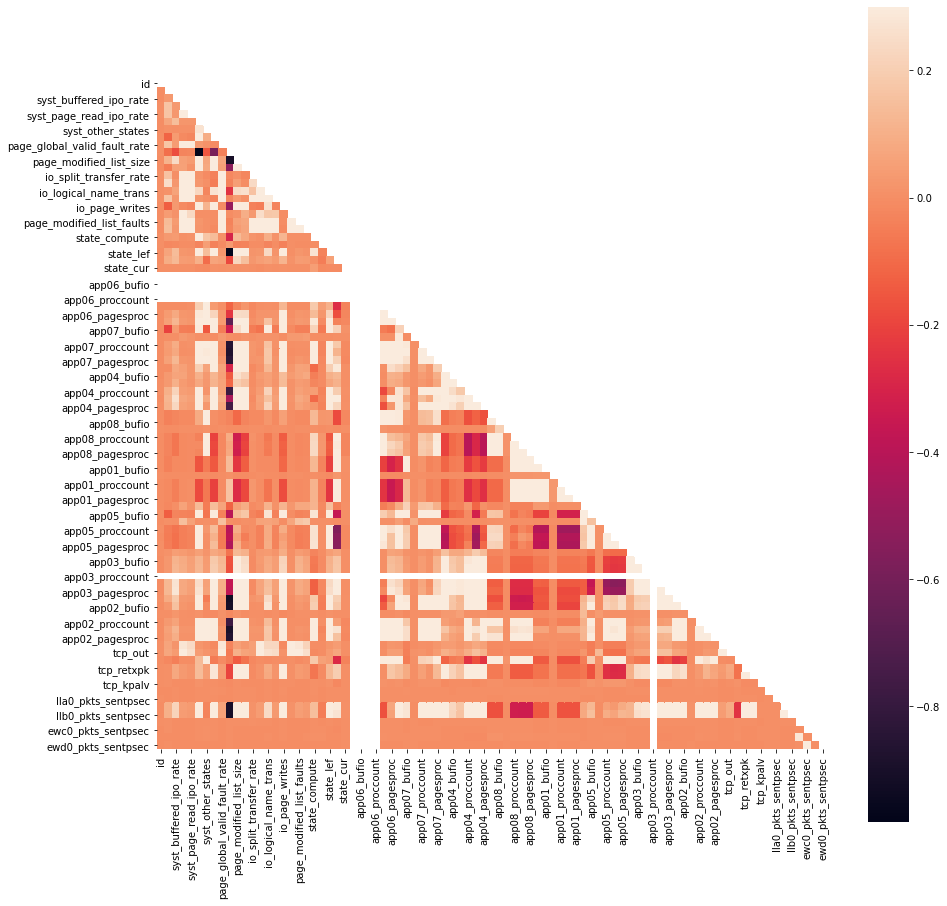

In [124]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style():
    f, ax = plt.subplots(figsize=(15, 15))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True)

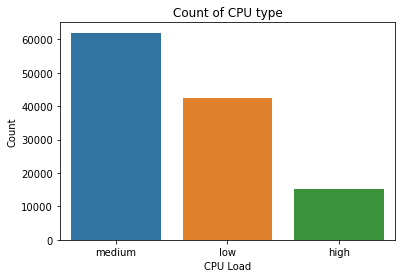

In [23]:
# Analyzing the target variable(Cpu load)

plt.title('Count of CPU type')
sns.countplot(df['cpu_load'])
plt.xlabel('CPU Load')
plt.ylabel('Count')
plt.show()

The dataset is not balanced and for the target variable as we can see that medium class variable representation is more compared to high we can balance this to train our model better 

Creating an sns pairplot for visualizing the dataset variables 

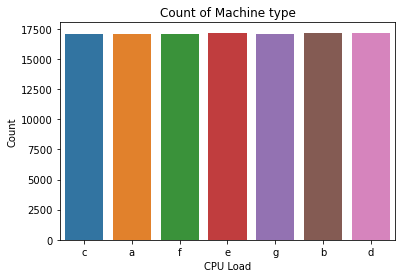

In [24]:
plt.title('Count of Machine type')
sns.countplot(df['m_id'])
plt.xlabel('CPU Load')
plt.ylabel('Count')
plt.show()

Machines count is equally balanced in the given dataset

In [28]:
pd.crosstab(df.cpu_load , df.size)

col_0,10660598
cpu_load,
high,15171
low,42595
medium,62016


In [29]:
pd.crosstab(df.m_id , df.size)

col_0,10660598
m_id,
a,17092
b,17172
c,17052
d,17137
e,17137
f,17099
g,17093


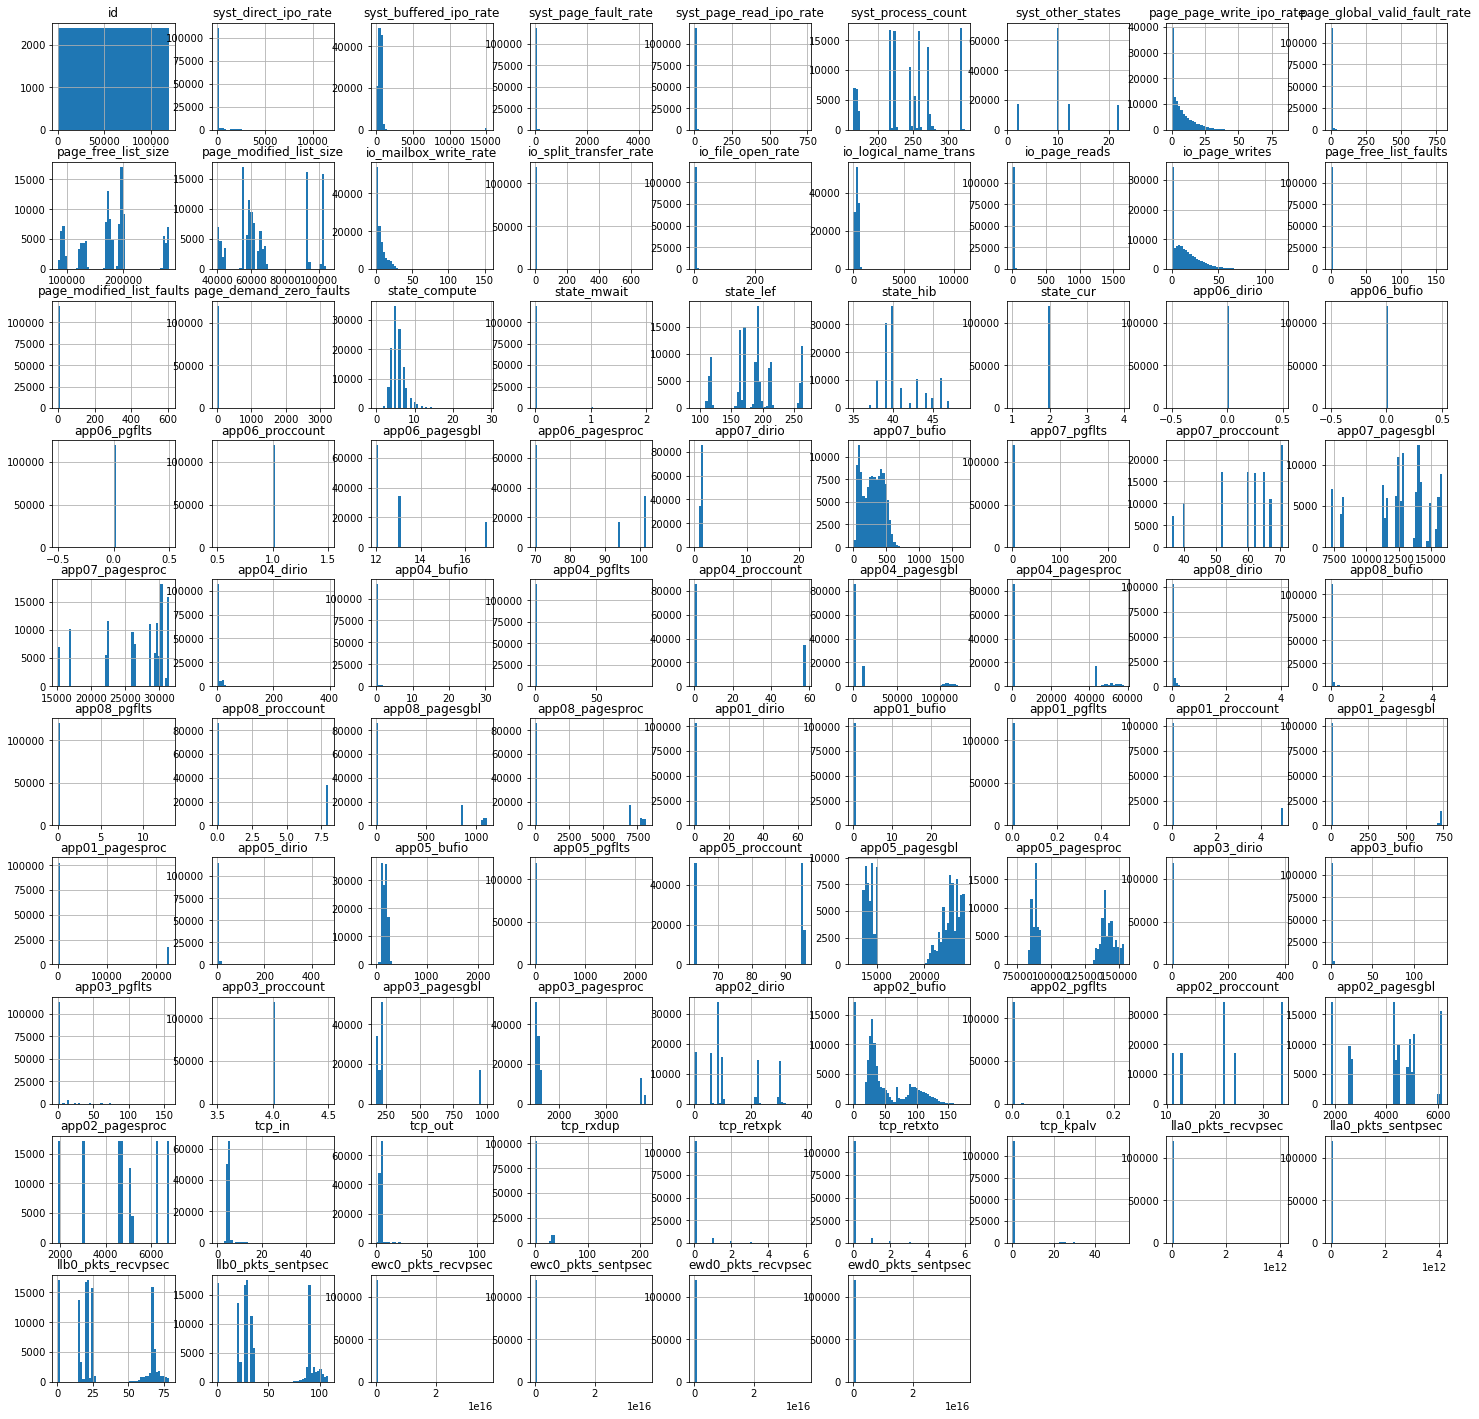

In [44]:
df.hist(bins=50, figsize=(25,25))
plt.show()

Checking for missing data 

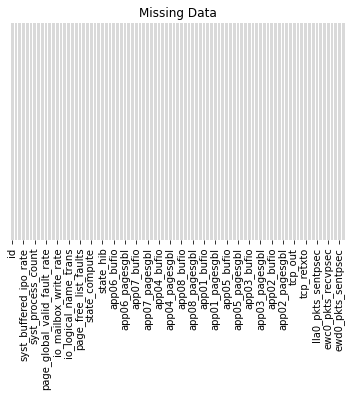

In [96]:
sns.heatmap(df.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')
plt.title('Missing Data')
plt.show()

In [20]:
y = df_train['cpu_load']

In [21]:
y.shape


(119782,)

In [22]:
y.dtypes

dtype('O')

In [23]:
X = df_train.drop(['m_id','cpu_load'], axis=1)

In [24]:
X.shape

(119782, 87)

#### Splitting data into test,train dataset

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_train.drop(['m_id','cpu_load'], axis=1), y,stratify=y,test_size=0.30 , random_state=42)
print("Size of training set:", X_train.shape)
print("Size of training set:", X_test.shape)

Size of training set: (83847, 87)
Size of training set: (35935, 87)


In [26]:
print('Number of data points in train data:', X_train.shape[0])
print('Number of data points in test data:', X_test.shape[0])

Number of data points in train data: 83847
Number of data points in test data: 35935


### Creating output function with Model Performance Parameters

In [27]:

def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    print("Number of misclassified points ",(len(test_y)-np.trace(C))/len(test_y)*100)
    
    ## For Recall matrix 
    # Recall — Also called Sensitivity, Probability of Detection, True Positive Rate. The ratio of correct positive predictions to the total positives examples.
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    #For Precision Matrix
    # Precision - Precision — Also called Positive predictive value. The ratio of correct positive predictions to the total predicted positives
    
    B =(C/C.sum(axis=0))
    
    labels = [1,2,3]
    cmap=sns.light_palette("blue")
   

    print("-"*50, "Confusion matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*50, "Precision matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of columns in precision matrix",B.sum(axis=0))
    
   
    print("-"*50, "Recall matrix"    , "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of rows in precision matrix",A.sum(axis=1))
    
    

Creating 10K sample 

In [28]:
X_tr = X_train.iloc[:10000]

y_tr = y_train.iloc[:10000]


### Decision Tree Classifier 

In [39]:
clf = DecisionTreeClassifier() #Instantiate Decision tree classifier
      # Use fit method on the train data


from sklearn.metrics import accuracy_score

In [40]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [41]:
  # Measure Accuracy
y_pred = clf.predict(X_test)   # Predict the target class of test data
accuracy_score(y_test, y_pred)

0.870516209823292

In [42]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_test, y_test, cv=5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.85960762 0.86225129 0.87032141 0.86433839 0.86559065]
Accuracy: 0.86 (+/- 0.01)


In [47]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        high       0.73      0.75      0.74      4551
         low       0.91      0.91      0.91     12779
      medium       0.88      0.87      0.88     18605

    accuracy                           0.87     35935
   macro avg       0.84      0.84      0.84     35935
weighted avg       0.87      0.87      0.87     35935



Tuning decision tree hyperparameters 

In [139]:
from sklearn.model_selection import GridSearchCV, cross_val_score
param_grid = {'criterion':['gini','entropy'], 'max_depth' :
[3,5,7,20]}
grid_search = GridSearchCV(clf,param_grid=param_grid,cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 20]})

In [80]:
grid_search.cv_results_['params']


[{'criterion': 'gini', 'max_depth': 3},
 {'criterion': 'gini', 'max_depth': 5},
 {'criterion': 'gini', 'max_depth': 7},
 {'criterion': 'gini', 'max_depth': 20},
 {'criterion': 'entropy', 'max_depth': 3},
 {'criterion': 'entropy', 'max_depth': 5},
 {'criterion': 'entropy', 'max_depth': 7},
 {'criterion': 'entropy', 'max_depth': 20}]

In [79]:
grid_search.cv_results_['mean_test_score']

array([0.85105014, 0.87724068, 0.89581021, 0.87818293, 0.84780612,
       0.86767565, 0.89250658, 0.87611962])

In [140]:
grid_search.best_estimator_


DecisionTreeClassifier(max_depth=7)

In [141]:
from sklearn.metrics import accuracy_score
y_pred_gs = grid_search.predict(X_test)
accuracy_score(y_test, y_pred_gs)

0.9003200222624183

Number of misclassified points  9.967997773758174
-------------------------------------------------- Confusion matrix --------------------------------------------------


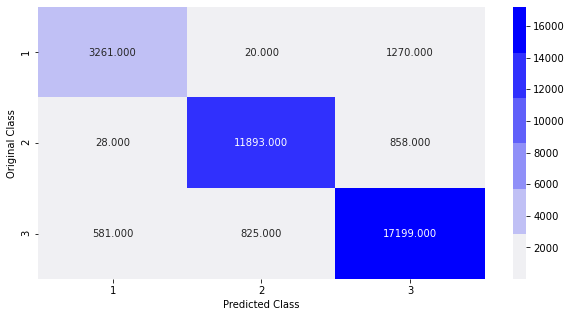

-------------------------------------------------- Precision matrix --------------------------------------------------


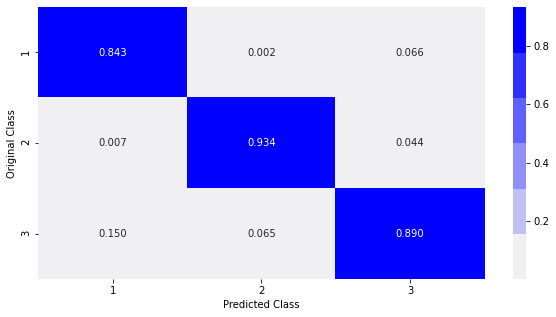

Sum of columns in precision matrix [1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


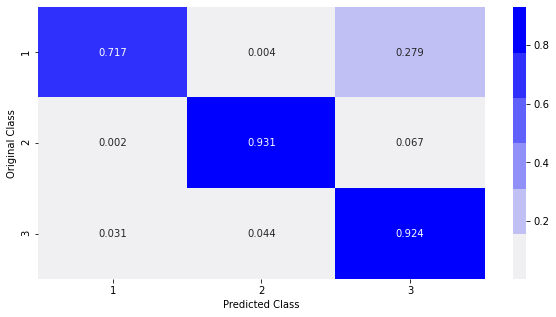

Sum of rows in precision matrix [1. 1. 1.]


In [162]:
plot_confusion_matrix(y_test, y_pred_gs)

In [165]:
d_clf = DecisionTreeClassifier(criterion='gini', max_depth= 7)

In [166]:
d_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7)

In [167]:
y_pred_dt = d_clf.predict(X_test)
accuracy_score(y_test, y_pred_dt)

0.9001808821483234

Number of misclassified points  9.981911785167664
-------------------------------------------------- Confusion matrix --------------------------------------------------


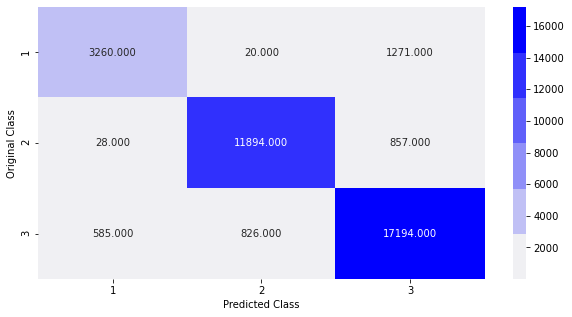

-------------------------------------------------- Precision matrix --------------------------------------------------


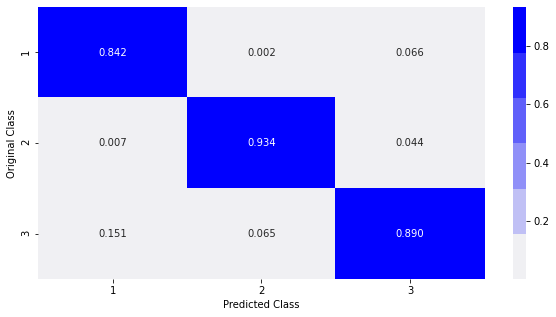

Sum of columns in precision matrix [1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


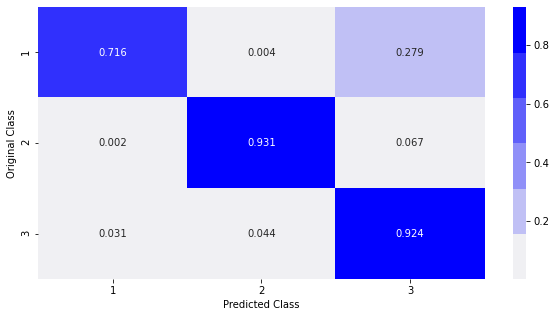

Sum of rows in precision matrix [1. 1. 1.]


In [168]:
plot_confusion_matrix(y_test, y_pred_dt)

In [185]:
d_clf.classes_

array(['high', 'low', 'medium'], dtype=object)

Trying out the first result of from decision tree and predicting on test data to upload the test result on kaggle

In [184]:

#put the probabilities into a dataframe for easier viewing
Y_pp = pd.DataFrame(d_clf.predict_proba(X_test), 
             columns=['high', 'low', 'medium'])
Y_pp.head()

,high,low,medium
0,0.051753,0.016792,0.931455
1,0.000634,0.997746,0.001620
2,0.000000,0.973721,0.026279
3,0.000000,0.973721,0.026279
4,0.000634,0.997746,0.001620


In [186]:
Y_pp = Y_pp.reindex(columns=['low', 'medium', 'high'])

In [187]:
Y_pp.head()

,low,medium,high
0,0.016792,0.931455,0.051753
1,0.997746,0.001620,0.000634
2,0.973721,0.026279,0.000000
3,0.973721,0.026279,0.000000
4,0.997746,0.001620,0.000634


In [188]:
X_test.head()

,id,syst_direct_ipo_rate,syst_buffered_ipo_rate,syst_page_fault_rate,syst_page_read_ipo_rate,syst_process_count,syst_other_states,page_page_write_ipo_rate,page_global_valid_fault_rate,page_free_list_size,...,tcp_retxto,tcp_kpalv,lla0_pkts_recvpsec,lla0_pkts_sentpsec,llb0_pkts_recvpsec,llb0_pkts_sentpsec,ewc0_pkts_recvpsec,ewc0_pkts_sentpsec,ewd0_pkts_recvpsec,ewd0_pkts_sentpsec
69901,69901,64.28,857.03,0.02,0.0,317,10,40.05,0.0,91283,...,0,0,352.400,484.217,72.983,102.400,329.517,326.383,346.450,332.600
106064,106064,34.92,183.77,0.00,0.0,224,10,0.68,0.0,200606,...,0,0,218.083,174.567,21.717,29.100,229.717,150.117,230.700,302.683
55117,55117,32.40,319.08,0.00,0.0,172,10,0.00,0.0,273532,...,0,0,279.033,279.733,0.733,0.017,374.283,256.683,219.550,292.650
117322,117322,35.05,386.25,0.00,0.0,252,10,2.93,0.0,178295,...,0,0,333.917,304.367,24.383,33.733,304.017,209.617,175.233,288.383
49735,49735,30.72,160.43,0.00,0.0,165,10,0.00,0.0,280697,...,0,0,252.967,300.983,0.700,0.017,365.917,287.317,236.417,163.950


In [17]:
df_test = df_test.drop(['m_id'], axis=1)

In [18]:
df_test.head()

,id,syst_direct_ipo_rate,syst_buffered_ipo_rate,syst_page_fault_rate,syst_page_read_ipo_rate,syst_process_count,syst_other_states,page_page_write_ipo_rate,page_global_valid_fault_rate,page_free_list_size,...,tcp_retxto,tcp_kpalv,lla0_pkts_recvpsec,lla0_pkts_sentpsec,llb0_pkts_recvpsec,llb0_pkts_sentpsec,ewc0_pkts_recvpsec,ewc0_pkts_sentpsec,ewd0_pkts_recvpsec,ewd0_pkts_sentpsec
0,0,30.20,335.77,0.00,0.00,165,10,0.00,0.00,280348,...,0,0,410.567,259.683,0.717,0.017,229.117,375.250,272.233,201.167
1,1,75.30,665.08,30.33,4.53,271,12,9.83,13.45,135805,...,1,0,484.250,516.700,67.817,89.483,666.533,554.267,496.233,387.850
2,2,31.02,251.00,0.00,0.00,259,22,0.38,0.00,171796,...,0,0,242.300,251.150,15.483,20.767,229.800,220.300,315.483,277.767
3,3,38.78,493.92,0.05,0.00,252,10,7.65,0.05,172948,...,0,0,394.900,515.850,25.033,34.550,302.733,230.600,308.483,273.650
4,4,62.83,379.27,0.00,0.00,318,10,0.27,0.00,88866,...,0,0,332.467,290.283,66.050,93.083,226.067,331.033,228.017,233.450


In [19]:
df_test.shape

(58998, 87)

In [196]:
Y_pp = pd.DataFrame(d_clf.predict_proba(df_test), 
             columns=['high', 'low', 'medium'])
Y_pp.head()

,high,low,medium
0,0.000000,0.973721,0.026279
1,0.000515,0.037333,0.962152
2,0.000634,0.997746,0.001620
3,0.000000,0.607509,0.392491
4,0.000634,0.997746,0.001620


In [197]:
Y_pp = Y_pp.reindex(columns=['low', 'medium', 'high'])

In [198]:
Y_pp.head()

,low,medium,high
0,0.973721,0.026279,0.000000
1,0.037333,0.962152,0.000515
2,0.997746,0.001620,0.000634
3,0.607509,0.392491,0.000000
4,0.997746,0.001620,0.000634


In [203]:
Y_pp.shape

(58998, 3)

In [204]:
Y_pp.to_csv (r'C:\Users\meeri\Documents\Plaksha TLF\ML Lab 1\Final Lab\submission.csv', header=True)

#### Checking out the feature importance given for 90% accuracy Decision tree model 

Features 1,2 and from 10 to 20 have higher importance 

Feature: 0, Score: 0.00007
Feature: 1, Score: 0.20563
Feature: 2, Score: 0.59977
Feature: 3, Score: 0.00024
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00008
Feature: 8, Score: 0.00014
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.01620
Feature: 11, Score: 0.00011
Feature: 12, Score: 0.00128
Feature: 13, Score: 0.00309
Feature: 14, Score: 0.04897
Feature: 15, Score: 0.00028
Feature: 16, Score: 0.00005
Feature: 17, Score: 0.00033
Feature: 18, Score: 0.00005
Feature: 19, Score: 0.00273
Feature: 20, Score: 0.00011
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.05216
Feature: 33, Score: 0.00017
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00000
Fe

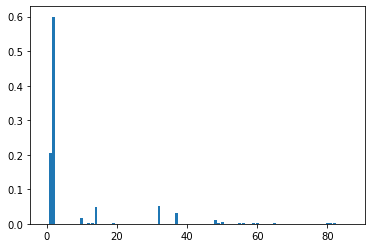

In [208]:
# Feature Importance :

importance = d_clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

### Random Forest Classifier 

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score

In [53]:
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
cv = cross_validate(rnd_clf, X=X_train, y=y_train, cv=5)
print("Test Scores",cv['test_score'])
print("Mean score", cv['test_score'].mean())

Test Scores [0.91037567 0.9104353  0.91007216 0.91025106 0.90810424]
Mean score 0.9098476854794921


In [54]:
from sklearn.model_selection import GridSearchCV

In [55]:
max_features_range = np.arange(14,28,2)
n_estimators_range = np.arange(500,700,50)
param_grid = dict(max_features=max_features_range, n_estimators=n_estimators_range)

In [56]:
grid = GridSearchCV(estimator=rnd_clf, param_grid=param_grid, cv=3, scoring="neg_log_loss")

In [57]:
grid.fit(X_tr, y_tr)


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(n_estimators=500, n_jobs=-1,
                                              random_state=42),
             param_grid={'max_features': array([14, 16, 18, 20, 22, 24, 26]),
                         'n_estimators': array([500, 550, 600, 650])},
             scoring='neg_log_loss')

In [58]:
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'max_features': 16, 'n_estimators': 650} with a score of -0.25


In [ ]:
size = []
for i in range(100,700,150):
 rnd_clf = RandomForestClassifier(n_estimators=i, criterion='gini',n_jobs=-1, random_state=42)
 cv = cross_validate(rnd_clf, X=X_train, y=y_train, cv=5,)
 mean_cv = cv['test_score'].mean()
 size.append((i,mean_cv))

In [219]:
size = pd.DataFrame(size)

In [220]:
size

,0,1
0,100,0.909693
1,150,0.909573
2,200,0.909227
3,250,0.909657
4,300,0.909705
5,350,0.909907
6,400,0.909609
7,450,0.909585
8,500,0.909848
9,550,0.910003


In [ ]:
features = []
for i in range(5,30,2):
 rnd_clf = RandomForestClassifier(max_features= i, n_jobs=-1, random_state=42)
 cv = cross_validate(rnd_clf, X=X_train, y=y_train, cv=5,)
 mean_cv = cv['test_score'].mean()
 features.append((i,mean_cv))

In [222]:
features = pd.DataFrame(features)

In [223]:
features

,0,1
0,5,0.906341
1,7,0.908357


In [235]:
rnd_clf = RandomForestClassifier(n_estimators=550, max_features=20,n_jobs=-1, random_state=42)

In [236]:
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(max_features=20, n_estimators=550, n_jobs=-1,
                       random_state=42)

In [238]:
y_pred_rf = rnd_clf.predict(X_test)
accuracy_score(y_test, y_pred_rf)

0.9157089188813134

Number of misclassified points  8.429108111868652
-------------------------------------------------- Confusion matrix --------------------------------------------------


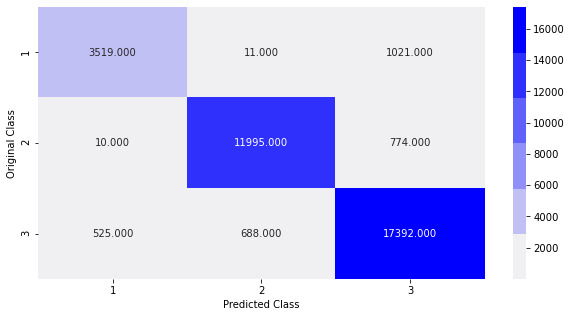

-------------------------------------------------- Precision matrix --------------------------------------------------


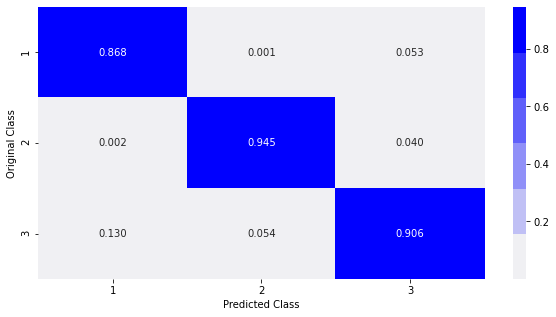

Sum of columns in precision matrix [1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


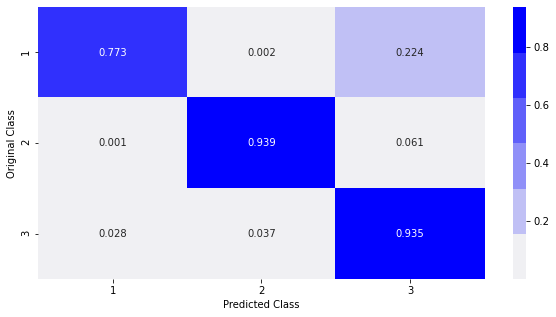

Sum of rows in precision matrix [1. 1. 1.]


In [239]:
plot_confusion_matrix(y_test, y_pred_rf)

In [240]:
rnd_clf.classes_

array(['high', 'low', 'medium'], dtype=object)

In [241]:

#put the probabilities into a dataframe for easier viewing
Y_pp_rnd = pd.DataFrame(rnd_clf.predict_proba(X_test), 
             columns=['high', 'low', 'medium'])
Y_pp_rnd.head()

,high,low,medium
0,0.105455,0.000000,0.894545
1,0.000000,0.994545,0.005455
2,0.000000,0.998182,0.001818
3,0.000000,0.920000,0.080000
4,0.000000,1.000000,0.000000


In [243]:
Y_pp_rnd = pd.DataFrame(rnd_clf.predict_proba(df_test), 
             columns=['high', 'low', 'medium'])
Y_pp_rnd.head()

,high,low,medium
0,0.000000,0.990909,0.009091
1,0.000000,0.176364,0.823636
2,0.000000,1.000000,0.000000
3,0.000000,0.658182,0.341818
4,0.001818,0.996364,0.001818


In [244]:
Y_pp_rnd = Y_pp_rnd.reindex(columns=['low', 'medium', 'high'])

In [245]:
Y_pp_rnd

,low,medium,high
0,0.990909,0.009091,0.000000
1,0.176364,0.823636,0.000000
2,1.000000,0.000000,0.000000
3,0.658182,0.341818,0.000000
4,0.996364,0.001818,0.001818
...,...,...,...
58993,0.134545,0.863636,0.001818
58994,0.280000,0.645455,0.074545
58995,0.860000,0.138182,0.001818
58996,0.000000,0.996364,0.003636


In [246]:
Y_pp_rnd.to_csv (r'C:\Users\meeri\Documents\Plaksha TLF\ML Lab 1\Final Lab\submission_rnd_f.csv', header=True)

In [247]:
from sklearn.feature_selection import SelectFromModel



In [248]:
sel = SelectFromModel(RandomForestClassifier(n_estimators=550, max_features=20,n_jobs=-1, random_state=42))
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(max_features=20,
                                                 n_estimators=550, n_jobs=-1,
                                                 random_state=42))

In [249]:
sel.get_support()


array([False,  True,  True, False, False, False, False,  True, False,
        True,  True,  True, False, False,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False])

In [250]:
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)

14

In [251]:
print(selected_feat)


Index(['syst_direct_ipo_rate', 'syst_buffered_ipo_rate',
       'page_page_write_ipo_rate', 'page_free_list_size',
       'page_modified_list_size', 'io_mailbox_write_rate',
       'io_logical_name_trans', 'io_page_writes', 'app07_bufio', 'app05_dirio',
       'app05_bufio', 'app02_bufio', 'lla0_pkts_recvpsec',
       'lla0_pkts_sentpsec'],
      dtype='object')


Now building and training model using only the selected features 

In [256]:
x_f = df_train[selected_feat]

In [257]:
x_f.shape

(119782, 14)

In [259]:
y.shape

(119782,)

In [260]:
from sklearn.model_selection import train_test_split

X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(x_f, y,stratify=y,test_size=0.30 , random_state =42)

In [262]:
rnd_clf_f = RandomForestClassifier(n_estimators=550, max_features=14,n_jobs=-1, random_state=42)

In [274]:
rnd_clf_f.fit(X_train, y_train)

RandomForestClassifier(max_features=14, n_estimators=550, n_jobs=-1,
                       random_state=42)

In [275]:
y_pred_rf_f = rnd_clf_f.predict(X_test)
accuracy_score(y_test, y_pred_rf_f)

0.9152080144705719

Number of misclassified points  8.479198552942814
-------------------------------------------------- Confusion matrix --------------------------------------------------


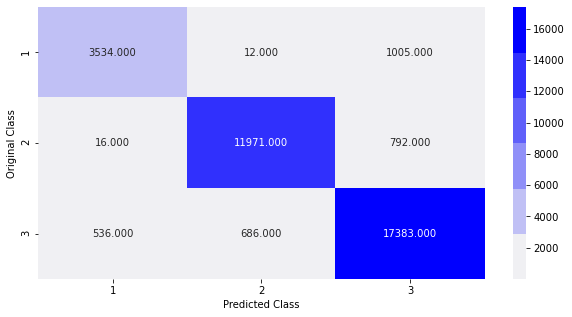

-------------------------------------------------- Precision matrix --------------------------------------------------


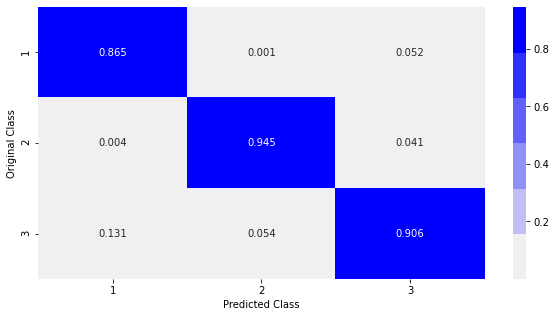

Sum of columns in precision matrix [1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


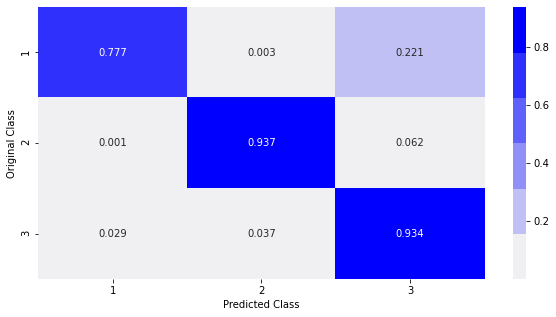

Sum of rows in precision matrix [1. 1. 1.]


In [276]:
plot_confusion_matrix(y_test, y_pred_rf_f)

In [ ]:
size = []
for i in range(550,1200,200):
 rnd_clf = RandomForestClassifier(n_estimators=i, criterion='gini',n_jobs=-1, random_state=42)
 cv = cross_validate(rnd_clf, X=X_train, y=y_train, cv=5,)
 mean_cv = cv['test_score'].mean()
 size.append((i,mean_cv))

In [272]:
size = pd.DataFrame(size)

In [273]:
size

,0,1
0,550,0.910003
1,750,0.909991


In [277]:
rnd_clf_f.classes_

array(['high', 'low', 'medium'], dtype=object)

In [285]:
#put the probabilities into a dataframe for easier viewing
Y_pp_f = pd.DataFrame(rnd_clf_f.predict_proba(df_test), 
             columns=['high', 'low', 'medium'])
Y_pp_f.head()

,high,low,medium
0,0.000000,0.992727,0.007273
1,0.005455,0.167273,0.827273
2,0.000000,1.000000,0.000000
3,0.000000,0.681818,0.318182
4,0.005455,0.990909,0.003636


In [286]:
Y_pp_f = Y_pp_f.reindex(columns=['low', 'medium', 'high'])

In [287]:
Y_pp_f

,low,medium,high
0,0.992727,0.007273,0.000000
1,0.167273,0.827273,0.005455
2,1.000000,0.000000,0.000000
3,0.681818,0.318182,0.000000
4,0.990909,0.003636,0.005455
...,...,...,...
58993,0.118182,0.880000,0.001818
58994,0.300000,0.627273,0.072727
58995,0.892727,0.105455,0.001818
58996,0.000000,0.998182,0.001818


In [288]:
Y_pp_f.to_csv (r'C:\Users\meeri\Documents\Plaksha TLF\ML Lab 1\Final Lab\submission_rnd_feat.csv', header=True)

In [45]:
 md = []
for i in range(18,30,2):
  rnd_clf = RandomForestClassifier(max_depth=i, n_jobs=-1, random_state=42)
  cv = cross_validate(rnd_clf, X=X_tr, y=y_tr, cv=5,)
  mean_cv = cv['test_score'].mean()
  md.append((i,mean_cv))

In [46]:
md

[(18, 0.9024000000000001),
 (20, 0.9022),
 (22, 0.9004999999999999),
 (24, 0.9004),
 (26, 0.9025000000000001),
 (28, 0.9003)]

 26 is the best max feature parameter 

In [24]:
rnd_class = RandomForestClassifier(n_estimators=550,max_features=20,max_depth=26, n_jobs=-1, random_state=42)

In [25]:
rnd_class.fit(X_train, y_train)

RandomForestClassifier(max_depth=26, max_features=20, n_estimators=550,
                       n_jobs=-1, random_state=42)

In [28]:
y_rf = rnd_class.predict(X_test)
accuracy_score(y_test, y_rf)

0.9158758870182273

In [34]:
Y_pp_rn = pd.DataFrame(rnd_class.predict_proba(df_test), 
             columns=['high', 'low', 'medium'])
Y_pp_rn.head()

,high,low,medium
0,0.000000,0.987244,0.012756
1,0.001889,0.176990,0.821121
2,0.000000,0.998179,0.001821
3,0.001818,0.707986,0.290196
4,0.001818,0.998169,0.000013


In [35]:
Y_pp_rn = Y_pp_rn.reindex(columns=['low', 'medium', 'high'])

In [36]:
Y_pp_rn.to_csv (r'C:\Users\meeri\Documents\Plaksha TLF\ML Lab 1\Final Lab\submission_rnd_best.csv', header=True)

Number of misclassified points  8.412411298177265
-------------------------------------------------- Confusion matrix --------------------------------------------------


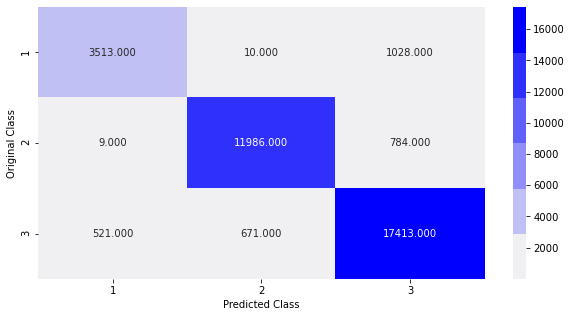

-------------------------------------------------- Precision matrix --------------------------------------------------


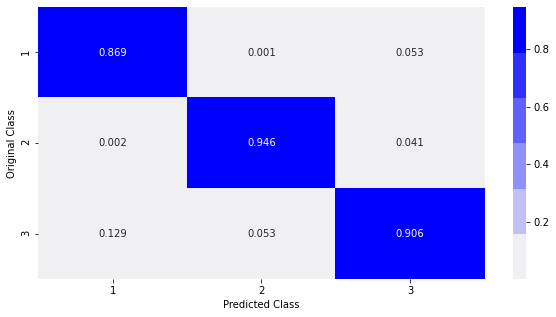

Sum of columns in precision matrix [1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


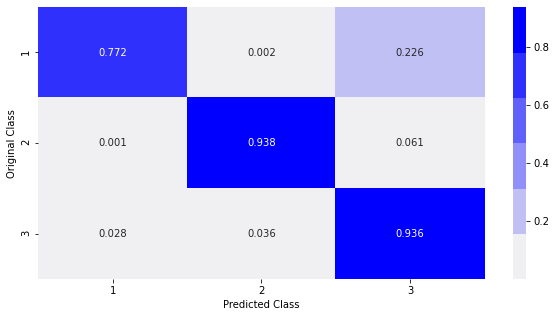

Sum of rows in precision matrix [1. 1. 1.]


In [51]:
plot_confusion_matrix(y_test, y_rf)

In [52]:
rnd_class1 = RandomForestClassifier(n_estimators=550,max_features=20,max_depth=26,min_samples_split=10, n_jobs=-1, random_state=42)

In [53]:
rnd_class1.fit(X_train, y_train)

RandomForestClassifier(max_depth=26, max_features=20, min_samples_split=10,
                       n_estimators=550, n_jobs=-1, random_state=42)

In [54]:
y_rf_1 = rnd_class1.predict(X_test)
accuracy_score(y_test, y_rf_1)

0.9155141227215806

Number of misclassified points  8.448587727841938
-------------------------------------------------- Confusion matrix --------------------------------------------------


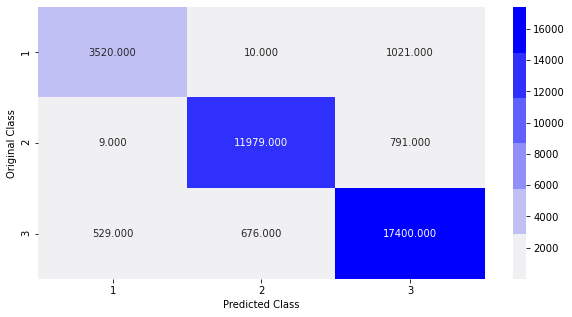

-------------------------------------------------- Precision matrix --------------------------------------------------


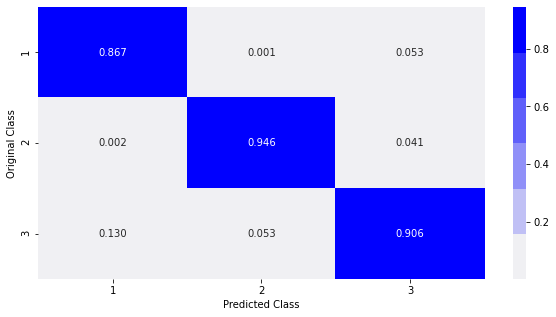

Sum of columns in precision matrix [1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


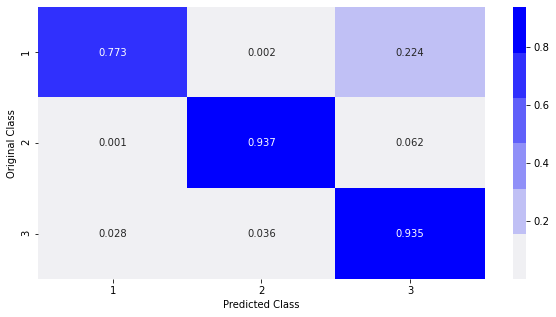

Sum of rows in precision matrix [1. 1. 1.]


In [55]:
plot_confusion_matrix(y_test, y_rf_1)

#### Best output so far is from the random forest classifier , training other parameters of the random forest classifier 

In [23]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [26],
    'max_features': [20],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [550],
    'max_samples':[0.5,0.6,0.3,0.8]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grids = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [24]:
grids.fit(X_tr,y_tr)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:  5.3min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [26],
                         'max_features': [20],
                         'max_samples': [0.5, 0.6, 0.3, 0.8],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [550]},
             verbose=2)

In [25]:
grids.best_params_

{'bootstrap': True,
 'max_depth': 26,
 'max_features': 20,
 'max_samples': 0.8,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 550}

In [31]:
y_b = grids.predict(X_test)

In [33]:
accuracy_score(y_test, y_b)


0.9027967162933074

In [34]:
confusion_matrix(y_test, y_b)


array([[ 3432,    46,  1073],
       [  112, 11749,   918],
       [  701,   643, 17261]], dtype=int64)

In [36]:
classification_report(y_test,y_b)

'              precision    recall  f1-score   support\n\n        high       0.81      0.75      0.78      4551\n         low       0.94      0.92      0.93     12779\n      medium       0.90      0.93      0.91     18605\n\n    accuracy                           0.90     35935\n   macro avg       0.88      0.87      0.87     35935\nweighted avg       0.90      0.90      0.90     35935\n'

### Trying different classifier models - AdaBoost and Gradient Boosting Classifiers 

#### Adaboost Classifier 

In [56]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [64]:
clf_A = AdaBoostClassifier(n_estimators=70, base_estimator = rnd_class )
clf_A.fit(X_train, y_train)
y_pred_a = clf_A.predict(X_test)
accuracy_score(y_test, y_pred_a)

0.9112007791846389

In [62]:
 nes = []
for i in range(50,100,20):
  rnd_clf = AdaBoostClassifier(n_estimators=i, random_state=42)
  cv = cross_validate(rnd_clf, X=X_tr, y=y_tr, cv=3,)
  mean_cv = cv['test_score'].mean()
  nes.append((i,mean_cv))

In [63]:
nes

[(50, 0.8608997072472695), (70, 0.861799917244274), (90, 0.8562994271832703)]

In [65]:
clf_Ab = AdaBoostClassifier(n_estimators=70, base_estimator = clf )


In [67]:
clf_Ab.fit(X_train, y_train)
y_pred_a = clf_Ab.predict(X_test)
accuracy_score(y_test, y_pred_a)

0.8689021844997913

### Gradient Boosting Classifier

In [4]:
from sklearn.ensemble import GradientBoostingClassifier

In [38]:

model = GradientBoostingClassifier()
model.fit(X_tr, y_tr)

GradientBoostingClassifier()

In [45]:
from sklearn.metrics import roc_curve, auc

In [39]:
y_gb = model.predict(X_test)
accuracy_score(y_test, y_gb)

0.900570474467789

In [49]:
learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01]
train_results = []
test_results = []
for eta in learning_rates:
   model = GradientBoostingClassifier(learning_rate=eta)
   model.fit(X_tr, y_tr)
   y_pred = model.predict(X_test)
   test_results.append(model.score(X_test,y_test))
   

In [50]:
test_results

[0.8861555586475581,
 0.8963127869764853,
 0.9022123278141088,
 0.9005148184221511,
 0.8958118825657437,
 0.8699596493669125]

Best result for 0.25 Learning Rate 

In [51]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
est_test = []
for n in n_estimators:
   model = GradientBoostingClassifier(n_estimators=n)
   model.fit(X_tr, y_tr)
   y_pred = model.predict(X_test)
   est_test.append(model.score(X_test,y_test))

In [52]:
est_test

[0.5177403645470989,
 0.8053986364268819,
 0.8435230276888827,
 0.8648949492138583,
 0.8821204953388062,
 0.8922498956449144,
 0.8971476276610547,
 0.9004869903993321,
 0.9031584805899541]

In [ ]:
n_estimators = [200,300,400,500,600]
est_test = []
for n in n_estimators:
   model = GradientBoostingClassifier(n_estimators=n)
   model.fit(X_tr, y_tr)
   y_pred = model.predict(X_test)
   est_test.append(model.score(X_test,y_test))

In [54]:
est_test

[0.903297620704049, 0.9040211492973425, 0.9035480729094197, 0.90326979268123]

In [ ]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
res = []
for n in max_depths:
   model = GradientBoostingClassifier(n_estimators=300,learning_rate=0.25,max_depth=n)
   model.fit(X_tr, y_tr)
   y_pred = model.predict(X_test)
   res.append(model.score(X_test,y_test))

In [31]:
res

[0.898010296368443,
 0.900570474467789,
 0.9013774871295395,
 0.9018227354946431,
 0.9024906080422986,
 0.9037428690691527,
 0.9051064421872826]

Trying out model with large n_estimators 

In [44]:
model_1 = GradientBoostingClassifier(n_estimators=1000,learning_rate=0.25,max_depth=10)
   

In [45]:
model_1.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.25, max_depth=10, n_estimators=1000)

In [46]:
y_pred = model_1.predict(X_test)
acc = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print("Accuracy Score :",acc*100)
print(" "*10)
print("*"*10, "Confusion Matrix" , "*"*10)
print(cm)

Accuracy Score : 90.15722832892723
          
********** Confusion Matrix **********
[[ 3426    69  1056]
 [   13 11680  1086]
 [  728   585 17292]]


Not a feasible model as time taken for training the model was too high ! Would prefer random forests for training speed 

In [51]:
model_2 = GradientBoostingClassifier(n_estimators=1000,learning_rate=0.25,max_depth=30)

In [ ]:
model_2.fit(X_train, y_train)

In [49]:
y_pred = model_2.predict(X_test)
acc = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print("Accuracy Score :",acc*100)
print(" "*10)
print("*"*10, "Confusion Matrix" , "*"*10)
print(cm)

Accuracy Score : 88.79643801307917
          
********** Confusion Matrix **********
[[ 3411    48  1092]
 [   45 11675  1059]
 [  897   885 16823]]


In [32]:
from sklearn.neural_network import MLPClassifier

In [38]:
clf1 = MLPClassifier(activation= 'relu', alpha=0.01, hidden_layer_sizes = (45,30,5,1), learning_rate= 'constant', solver='adam')

In [39]:
clf1.fit(X_train,y_train)

MLPClassifier(alpha=0.01, hidden_layer_sizes=(45, 30, 5, 1))

In [42]:
y_pred = clf1.predict(X_test)
acc = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print("Accuracy Score :",acc*100)
print(" "*10)
print("*"*10, "Confusion Matrix" , "*"*10)
print(cm)

Accuracy Score : 51.77403645470989
          
********** Confusion Matrix **********
[[    0     0  4551]
 [    0     0 12779]
 [    0     0 18605]]


### Final Results from all models run 


In [43]:
from prettytable import PrettyTable

table = PrettyTable()

table.title = 'Results for Classification of CPU-Loads'
table.field_names = ['Model', 'Accuracy of Model']
table.add_row(['Decision Tree', 90.032])
table.add_row(['Random Forest', 91.587])
table.add_row(['Ada Boost', 86.891])
table.add_row(['Gradient Boost', 90.510])
print(table)

+------------------------------------------+
| Results for Classification of CPU-Loads  |
+-------------------+----------------------+
|       Model       |  Accuracy of Model   |
+-------------------+----------------------+
|   Decision Tree   |        90.032        |
|   Random Forest   |        91.587        |
|     Ada Boost     |        86.891        |
|   Gradient Boost  |        90.51         |
+-------------------+----------------------+


#### Random forest gave the best results : 

#### Final Model training paremeters and output 

In [ ]:
rnd_class = RandomForestClassifier(n_estimators=550,max_features=20,max_depth=26, n_jobs=-1, random_state=42)

### Hyperparameters selected for final model are :

n_estimators=550,
max_features=20,
max_depth=26

In [ ]:
rnd_class.fit(X_train, y_train)

In [ ]:
y_rf = rnd_class.predict(X_test)
accuracy_score(y_test, y_rf)

In [ ]:
plot_confusion_matrix(y_test, y_rf)

In [ ]:
Y_pp_rn = pd.DataFrame(rnd_class.predict_proba(df_test),columns=['high', 'low', 'medium'])
Y_pp_rn.head()



In [ ]:
Y_pp_rn = Y_pp_rn.reindex(columns=['low', 'medium', 'high'])

Y_pp_rn.to_csv (r'C:\Users\meeri\Documents\Plaksha TLF\ML Lab 1\Final Lab\submission_rnd_best.csv', header=True)